In [28]:
from google.colab import files
uploaded = files.upload()

Saving training_mathbert.xlsx to training_mathbert.xlsx


Metric values made by the trained model for one attribute:
MSE_train: 1.33638
RMSE_train: 1.15602
MAPE_train: 309577516.71648
R2_train: 0.02388

Metric values made by the test model for one attribute:
MSE_test: 1.36655
RMSE_test: 1.169
MAPE_test: 141404167.92513
R2_test: 0.00717
Metric values made by the trained model for all attributes:
MSE_train: 1.30599
RMSE_train: 1.1428
MAPE_train: 290915078.13325
R2_train: 0.04608

Metric values made by the test model for all attributes:
MSE_test: 1.35301
RMSE_test: 1.16319
MAPE_test: 145444005.24018
R2_test: 0.01701
Cluster labels: [0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1
 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1

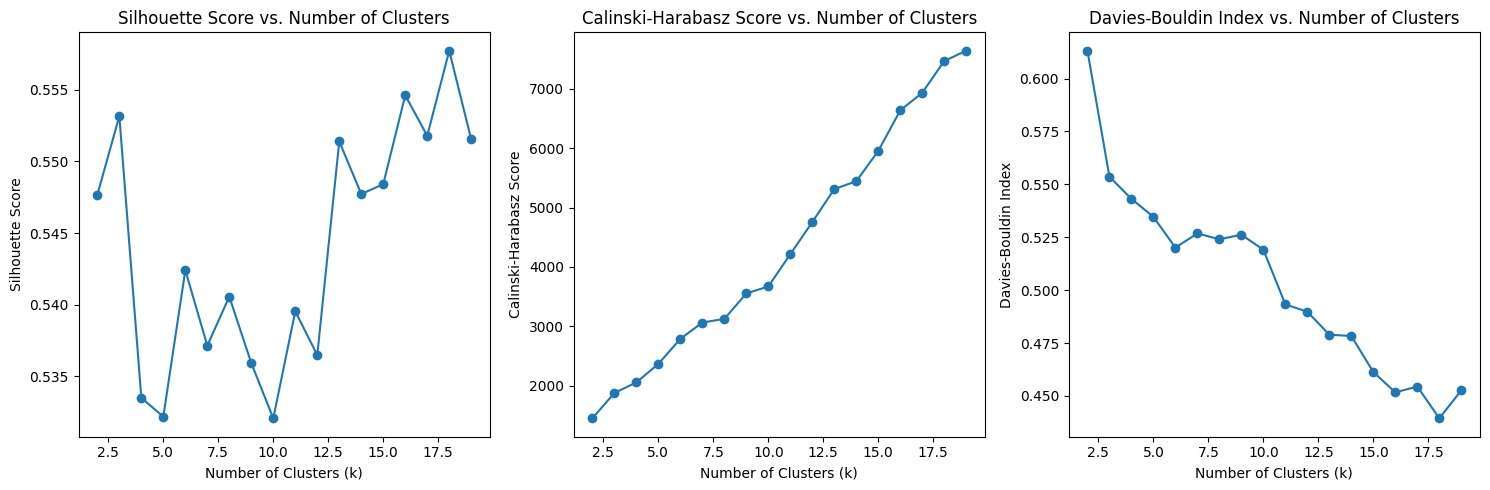

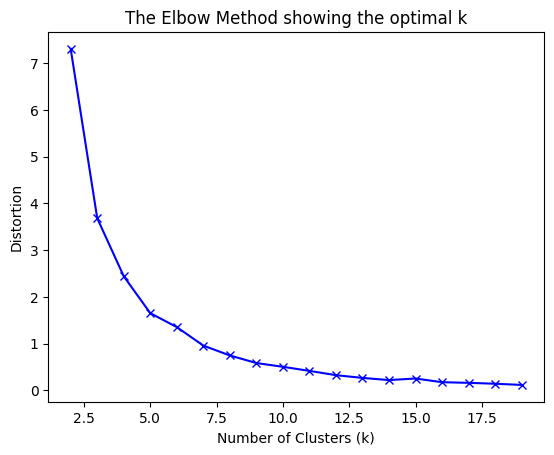

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def split_data(X, y, test_size=0.2, random_state=42):
    """Split data into training and test sets."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def calc_metrics(y_train, y_train_pred, y_test, y_test_pred):
    """Calculate and return evaluation metrics for train and test data."""
    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)
    RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
    RMSE_test = mean_squared_error(y_test, y_test_pred, squared=False)
    MAPE_train = (abs((y_train - y_train_pred) / (y_train + 1e-8)).mean()) * 100
    MAPE_test = (abs((y_test - y_test_pred) / (y_test + 1e-8)).mean()) * 100
    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)
    return MSE_train, RMSE_train, MAPE_train, R2_train, MSE_test, RMSE_test, MAPE_test, R2_test

def plot_distortions(k_values, distortions):
    """Plot the distortions to find the optimal k value for k-means clustering."""
    plt.plot(k_values, distortions, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

def evaluate_clustering(X, k_values):
    """Evaluate k-means clustering for different k values and plot clustering metrics."""
    sil_scores = []
    ch_scores = []
    dav_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
        labels = kmeans.labels_
        sil_scores.append(silhouette_score(X, labels))
        ch_scores.append(calinski_harabasz_score(X, labels))
        dav_scores.append(davies_bouldin_score(X, labels))

    plt.figure(figsize=(15, 5))

    # Silhouette Score Plot
    plt.subplot(1, 3, 1)
    plt.plot(k_values, sil_scores, marker='o')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")

    # Calinski-Harabasz Score Plot
    plt.subplot(1, 3, 2)
    plt.plot(k_values, ch_scores, marker='o')
    plt.title("Calinski-Harabasz Score vs. Number of Clusters")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Calinski-Harabasz Score")

    # Davies-Bouldin Index Plot
    plt.subplot(1, 3, 3)
    plt.plot(k_values, dav_scores, marker='o')
    plt.title("Davies-Bouldin Index vs. Number of Clusters")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Davies-Bouldin Index")

    plt.tight_layout()
    plt.show()

def perform_kmeans(X, n_clusters):
    """Perform k-means clustering and return the model."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
    return kmeans

def main():
    # Load the data
    data = pd.read_excel("training_mathbert.xlsx")
    df = pd.DataFrame(data)
    # Separate features and target variable
    df = df.drop(["class(0/1)"], axis=1)
    X = df[["embed_1"]].values
    y = df["output"].values

    # Linear Regression with one attribute
    X = X.reshape(-1, 1)
    X_train, X_test, y_train, y_test = split_data(X, y)
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)

    MSE_train, RMSE_train, MAPE_train, R2_train, MSE_test, RMSE_test, MAPE_test, R2_test = calc_metrics(
        y_train, y_train_pred, y_test, y_test_pred)

    print("Metric values made by the trained model for one attribute:")
    print(f"MSE_train: {round(MSE_train, 5)}")
    print(f"RMSE_train: {round(RMSE_train, 5)}")
    print(f"MAPE_train: {round(MAPE_train, 5)}")
    print(f"R2_train: {round(R2_train, 5)}")
    print("\nMetric values made by the test model for one attribute:")
    print(f"MSE_test: {round(MSE_test, 5)}")
    print(f"RMSE_test: {round(RMSE_test, 5)}")
    print(f"MAPE_test: {round(MAPE_test, 5)}")
    print(f"R2_test: {round(R2_test, 5)}")

    # Linear Regression with multiple attributes
    X_all_attrs = df[["embed_1", "embed_2", "embed_3", "embed_4"]].values
    X_newtrain, X_newtest, y_newtrain, y_newtest = split_data(X_all_attrs, y)
    reg = LinearRegression().fit(X_newtrain, y_newtrain)
    y_newtrain_pred = reg.predict(X_newtrain)
    y_newtest_pred = reg.predict(X_newtest)

    MSE_train, RMSE_train, MAPE_train, R2_train, MSE_test, RMSE_test, MAPE_test, R2_test = calc_metrics(
        y_newtrain, y_newtrain_pred, y_newtest, y_newtest_pred)

    print("Metric values made by the trained model for all attributes:")
    print(f"MSE_train: {round(MSE_train, 5)}")
    print(f"RMSE_train: {round(RMSE_train, 5)}")
    print(f"MAPE_train: {round(MAPE_train, 5)}")
    print(f"R2_train: {round(R2_train, 5)}")
    print("\nMetric values made by the test model for all attributes:")
    print(f"MSE_test: {round(MSE_test, 5)}")
    print(f"RMSE_test: {round(RMSE_test, 5)}")
    print(f"MAPE_test: {round(MAPE_test, 5)}")
    print(f"R2_test: {round(R2_test, 5)}")

    # K-Means Clustering
    kmeans = perform_kmeans(X_train, n_clusters=2)
    print("Cluster labels:", kmeans.labels_)
    print("Cluster centers:", kmeans.cluster_centers_)

    # Clustering metrics
    sil_score = silhouette_score(X_train, kmeans.labels_)
    ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
    dav_score = davies_bouldin_score(X_train, kmeans.labels_)
    print(f"Silhouette Score: {sil_score}")
    print(f"Calinski Harabasz Score: {ch_score}")
    print(f"Davies Bouldin Score: {dav_score}")

    # Evaluate clustering metrics for different k values
    k_values = list(range(2, 20))
    evaluate_clustering(X_train, k_values)

    # Evaluate clustering for different k values
    distortions = [KMeans(n_clusters=k, n_init="auto").fit(X_train).inertia_ for k in k_values]
    plot_distortions(k_values, distortions)
if __name__== "__main__":
  main()